# Logistic Regression implementation 

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


The dataset has already been analysed and preprocessed. Hence some columns are dropped and some are taken with special consideration. But all of these are studied and logical. If the look abtruse, read the documentation. 


In [2]:
dataset = pd.read_csv('Dataset With IDNumbers And Output with Result.csv')
dataset1=dataset.drop_duplicates()
dataset1.drop(['Controller ID'], axis=1)
del dataset1['Controller ID']
print ("Dataset Lenght: ", len(dataset)) 
print ("Dataset Shape: ", dataset.shape) 
print ("Dataset Lenght: ", len(dataset1)) 
print ("Dataset Shape: ", dataset1.shape) 
x = dataset1.iloc[:,0:4].values
y= dataset1.iloc[:,4].values

Dataset Lenght:  81002
Dataset Shape:  (81002, 6)
Dataset Lenght:  78854
Dataset Shape:  (78854, 5)


Using SCIKIT Learn to implement Logistic Regression. 


In [8]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=14500,random_state = 0)
# Regularisation Paramaeter hase been varied for variance in results.
classifier.fit(x_train,y_train)




LogisticRegression(C=14500, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Varying accuracy by varying the regularisation Parameter of


([<matplotlib.axis.XTick at 0x20043a97a48>,
 <a list of 3 Text xticklabel objects>)

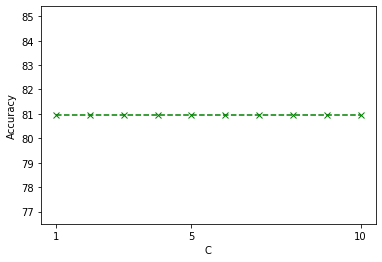

In [10]:
import numpy as np
from sklearn.metrics import accuracy_score


k_range = range(1,11)
scores = []
score_100=[]
for k in k_range:
    svclassifier = LogisticRegression(C= k)
    svclassifier.fit(x_train, y_train)
    scores.append(svclassifier.score(x_test,y_test))
for items in scores:
    score_100.append(items*100)
    
plt.figure()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(k_range,score_100,'--x',color='green')
plt.xticks([1,5,10])


Logistic Regression doesn't vary in perfomance when subject to change in the value of C - Inverse Regularisation Strength. Smaller values of C means stronger Regularisation. Higher means weaker Regularisation.